# Datasets used in the course
/data/pandas is a Volume mount from local host

In [1]:
DATA_FOLDER = "/data/pandas"

In [2]:
%ls /data/pandas

acs_ny.csv              doctors.csv          survey_person.csv
banklist.csv            doctors_unicode.csv  survey_site.csv
billboard.csv           gapminder.tsv        survey_survey.csv
bladder.csv             housing.csv          survey_visited.csv
concat_1.csv            housing_renamed.csv  tesla_stock_yahoo.csv
concat_2.csv            pew.csv              weather.csv
concat_3.csv            raw_data_urls.txt    wine.csv
country_timeseries.csv  scientists.csv


In [3]:
import pandas as pd

# Selection rows and columns from DataFrame

In [4]:
df = pd.read_csv(DATA_FOLDER + "/gapminder.tsv", sep="\t")

In [5]:
df.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [8]:
# Nbr rows and colums
df.shape

(1704, 6)

In [9]:
# List of columns
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [11]:
# Columns datatypes
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [12]:
# General info on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [16]:
# Selecting columns
df[['country', 'continent']].head()

country continent
0  Afghanistan      Asia
1  Afghanistan      Asia
2  Afghanistan      Asia
3  Afghanistan      Asia
4  Afghanistan      Asia

In [18]:
# Selecting rows - loc (index)
df.loc[0:5]

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360

In [20]:
# Getting the last row - calculated
nbr_rows = df.shape[0]
df.loc[nbr_rows-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [21]:
# Getting the last row - iloc
df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [25]:
# Getting multiple rows - iloc
df.iloc[[0, 99, 199]]

country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
99     Bangladesh      Asia  1967   43.453  62821884  721.186086
199  Burkina Faso    Africa  1987   49.557   7586551  912.063142

In [16]:
# Subsetting rows and columns, first element  = row list / range, second element = column list
df.loc[[0,2,5],['country', 'year', 'pop']]
df.loc[0:5, ['country', 'year', 'pop']]

country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460

In [26]:
# Subsetting using iloc, only integer list / ranges is allowed
df.iloc[range(10,20,2), 0:3]

country continent  year
10  Afghanistan      Asia  2002
12      Albania    Europe  1952
14      Albania    Europe  1962
16      Albania    Europe  1972
18      Albania    Europe  1982

# Aggregating rows from DataFrame

In [37]:
# groupby - (list of columns to group by)[list of columns to perform aggregate calculations]
df.groupby(['year', 'continent'])['lifeExp', 'gdpPercap'].mean().head(7)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733

In [40]:
# Number of countries per continent
df.groupby(['continent'])['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [43]:
%matplotlib inline

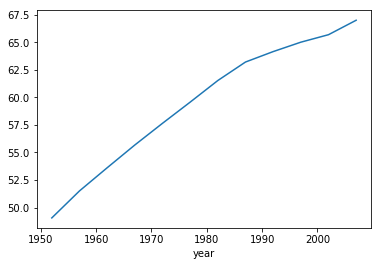

In [44]:
# small viz
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
global_yearly_life_expectancy.plot()